In [1]:
import tensorflow as tf
from tensorflow import keras

import math
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 16
})

SAVE_FIG = True

def save_fig(name, tight_layout = True):
    if SAVE_FIG:
        if not os.path.isdir("plots"):
            os.mkdir("plots")
        print(f"Saving figure {name} ...")
        if tight_layout:
            plt.tight_layout(pad=0.4)
        plt.savefig(f"plots/{name}.pdf", backend="pgf")

In [2]:
print(tf.__version__)

2.5.0


In [3]:
xs = tf.linspace(0, 14, 4000)
ys = tf.math.sin(xs)

Saving figure sine-curve ...


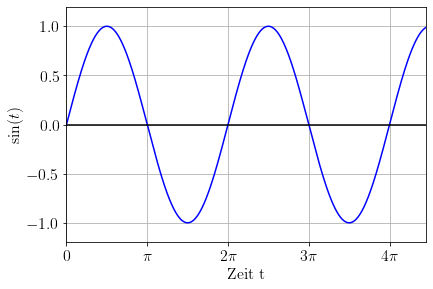

In [4]:
plt.plot(xs, ys, "b-")
plt.plot()
plt.grid()
plt.plot([-10, 20], [0, 0], "k-")
plt.axis([0, 14, -1.2, 1.2])
plt.xlabel("Zeit t")
plt.ylabel("$\sin(t)$")
plt.xticks(tf.range(0, 5 * math.pi, math.pi), ["0", "$\pi$", "$2\pi$", "$3\pi$", "$4\pi$"])
save_fig("sine-curve")
plt.show()

Saving figure sine-data ...


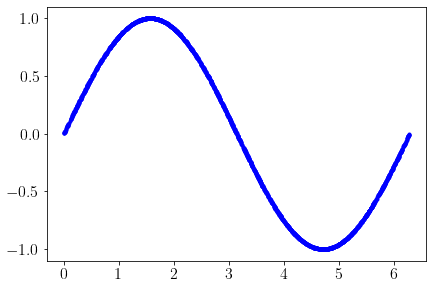

In [5]:
SAMPLES = 2000

tf.random.set_seed(42)

x = tf.random.uniform((SAMPLES, 1), minval=0, maxval=2*math.pi)

tf.random.shuffle(x)

y = tf.math.sin(x)

plt.plot(x, y, "b.")
save_fig("sine-data")
plt.show()

Saving figure sine-data-noise ...


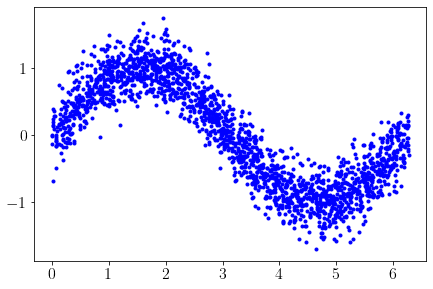

In [6]:
y += 0.25 * tf.random.normal(y.shape)
plt.plot(x, y, "b.")
save_fig("sine-data-noise")
plt.show()

In [7]:
TRAIN_SPLIT = int(0.5 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES)
VAL_SPLIT = SAMPLES - TRAIN_SPLIT - TEST_SPLIT

x_train, x_test, x_val = tf.split(x, [TRAIN_SPLIT, TEST_SPLIT, VAL_SPLIT])
y_train, y_test, y_val = tf.split(y, [TRAIN_SPLIT, TEST_SPLIT, VAL_SPLIT])

assert tf.size(x_train) + tf.size(x_test) + tf.size(x_val) == SAMPLES

Saving figure sine-data-noise-legend ...


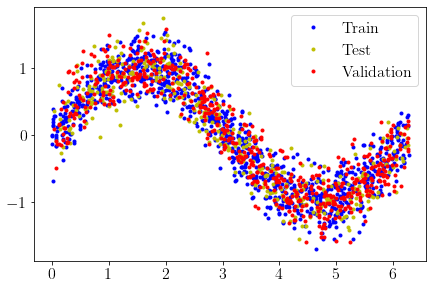

In [8]:
plt.plot(x_train, y_train, "b.", label="Train")
plt.plot(x_test, y_test, "y.", label="Test")
plt.plot(x_val, y_val, "r.", label="Validation")
plt.legend()
save_fig("sine-data-noise-legend")
plt.show()

In [9]:
input_layer = keras.layers.Input(shape=[1])
hidden1 = keras.layers.Dense(16, activation="relu", name="hidden1")(input_layer)
output = keras.layers.Dense(1, name="output")(hidden1)
model_1 = keras.Model(inputs=input_layer, outputs=output)

In [10]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
hidden1 (Dense)              (None, 16)                32        
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [11]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_1.compile(optimizer=sgd, loss="mse", metrics=["mae"])

In [12]:
EPOCHS = 200
BATCH_SIZE = 16
history_1 = model_1.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_val, y_val))

Epoch 1/200
63/63 [==============================] - 1s 4ms/step - loss: 0.7823 - mae: 0.7269 - val_loss: 0.5892 - val_mae: 0.6762
Epoch 2/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5858 - mae: 0.6705 - val_loss: 0.5957 - val_mae: 0.6801
Epoch 3/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5855 - mae: 0.6681 - val_loss: 0.6038 - val_mae: 0.6845
Epoch 4/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5850 - mae: 0.6699 - val_loss: 0.6005 - val_mae: 0.6827
Epoch 5/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5867 - mae: 0.6693 - val_loss: 0.6032 - val_mae: 0.6842
Epoch 6/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5892 - mae: 0.6730 - val_loss: 0.5884 - val_mae: 0.6756
Epoch 7/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5865 - mae: 0.6707 - val_loss: 0.5949 - val_mae: 0.6796
Epoch 8/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5839 - m

In [13]:
history_1.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [14]:
loss_1 = history_1.history["loss"]
val_loss_1 = history_1.history["val_loss"]
assert len(loss_1) == len(val_loss_1) == EPOCHS

In [15]:
train_epochs = tf.range(1.0, EPOCHS + 1)
val_epochs = train_epochs + 0.5

def plot_loss(loss, val_loss, skip, model_num):
    plt.plot(train_epochs, loss, "b-", label="Training Loss")
    plt.plot(val_epochs, val_loss, "g-", label="Validation Loss")
    plt.xlabel("Epochen")
    plt.ylabel("Loss")
    plt.legend()
    save_fig(f"{model_num}-train-val-mse")
    plt.show()

    plt.plot(train_epochs[skip:], loss[skip:], "b-", label="Training Loss")
    plt.plot(val_epochs[skip:] + 0.5, val_loss[skip:], "g-", label="Validation Loss")
    plt.xlabel("Epochen")
    plt.ylabel("Loss")
    plt.legend()
    save_fig(f"{model_num}-train-val-mse-zoom")
    plt.show()

Saving figure 1-train-val-mse ...


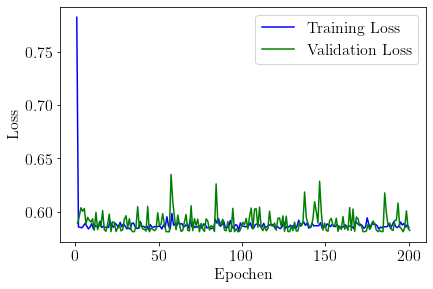

Saving figure 1-train-val-mse-zoom ...


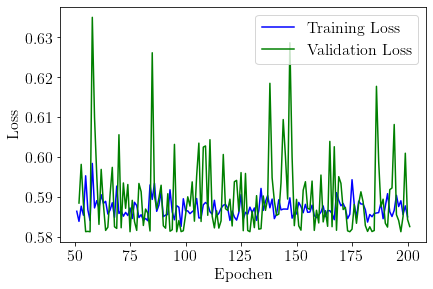

In [16]:
plot_loss(loss_1, val_loss_1, skip=50, model_num=1)

In [17]:
def plot_mae(mae, val_mae, skip, model_num):
    plt.plot(train_epochs[skip:], mae[skip:], "b-", label="Training MAE")
    plt.plot(val_epochs[skip:], val_mae[skip:], "g-", label="Validation MAE")
    plt.xlabel("Epochen")
    plt.ylabel("Loss")
    plt.legend()
    save_fig(f"{model_num}-train-val-mae")
    plt.show()

Saving figure 1-train-val-mae ...


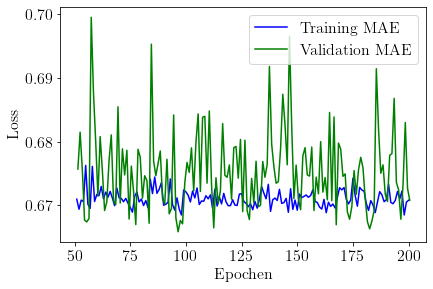

In [18]:
mae_1 = history_1.history["mae"]
val_mae_1 = history_1.history["val_mae"]

plot_mae(mae_1, val_mae_1, skip=50, model_num=1)

In [19]:
def plot_predictions(predictions, model_num):
    plt.plot(x_test, y_test, "b.", label="Wahrheit")
    plt.plot(x_test, predictions, "y.", label="Prognose")
    plt.legend()
    save_fig(f"{model_num}-predictions")
    plt.show()

Saving figure 1-predictions ...


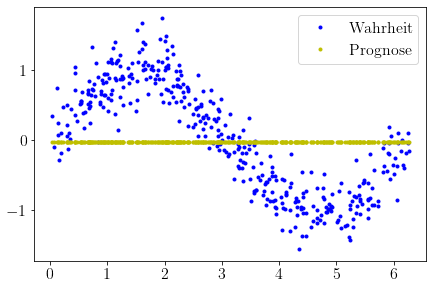

In [20]:
predictions_1 = model_1.predict(x_test)
plot_predictions(predictions_1, model_num=1)

In [21]:
input_layer = keras.layers.Input(shape=[1])
hidden1 = keras.layers.Dense(16, activation="relu", name="hidden1")(input_layer)
hidden2 = keras.layers.Dense(64, activation="relu", name="hidden2")(hidden1)
output = keras.layers.Dense(1, name="output")(hidden2)
model_2 = keras.Model(inputs=input_layer, outputs=output)

In [22]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
hidden1 (Dense)              (None, 16)                32        
_________________________________________________________________
hidden2 (Dense)              (None, 64)                1088      
_________________________________________________________________
output (Dense)               (None, 1)                 65        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_2.compile(optimizer=sgd, loss="mse", metrics=["mae"])

In [24]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=EPOCHS,
    monitor="loss",
    verbose=1,
    restore_best_weights=True)
history_2 = model_2.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping_cb])

Epoch 1/200
63/63 [==============================] - 0s 4ms/step - loss: 0.4860 - mae: 0.5601 - val_loss: 0.2171 - val_mae: 0.3832
Epoch 2/200
63/63 [==============================] - 0s 3ms/step - loss: 0.2360 - mae: 0.3981 - val_loss: 0.2149 - val_mae: 0.3774
Epoch 3/200
63/63 [==============================] - 0s 4ms/step - loss: 0.2364 - mae: 0.3932 - val_loss: 0.2499 - val_mae: 0.4070
Epoch 4/200
63/63 [==============================] - 0s 3ms/step - loss: 0.2488 - mae: 0.4035 - val_loss: 0.2328 - val_mae: 0.3950
Epoch 5/200
63/63 [==============================] - 0s 4ms/step - loss: 0.2442 - mae: 0.4020 - val_loss: 0.2140 - val_mae: 0.3794
Epoch 6/200
63/63 [==============================] - 0s 3ms/step - loss: 0.2534 - mae: 0.4041 - val_loss: 0.2434 - val_mae: 0.4051
Epoch 7/200
63/63 [==============================] - 0s 3ms/step - loss: 0.2419 - mae: 0.3999 - val_loss: 0.2176 - val_mae: 0.3765
Epoch 8/200
63/63 [==============================] - 0s 3ms/step - loss: 0.2516 - m

Saving figure 2-train-val-mse ...


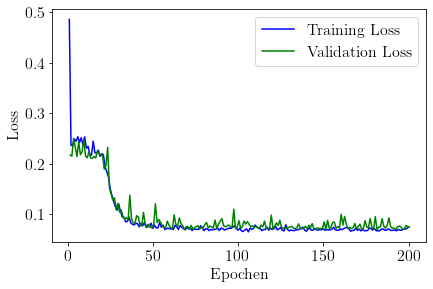

Saving figure 2-train-val-mse-zoom ...


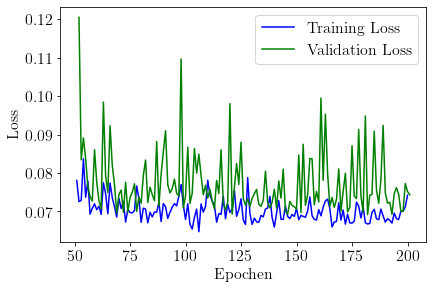

In [25]:
loss_2 = history_2.history["loss"]
val_loss_2 = history_2.history["val_loss"]

plot_loss(loss_2, val_loss_2, skip=50, model_num=2)

Saving figure 2-train-val-mae ...


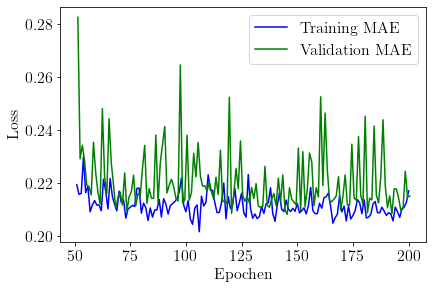

In [26]:
mae_2 = history_2.history["mae"]
val_mae_2 = history_2.history["val_mae"]

plot_mae(mae_2, val_mae_2, skip=50, model_num=2)

Saving figure 2-predictions ...


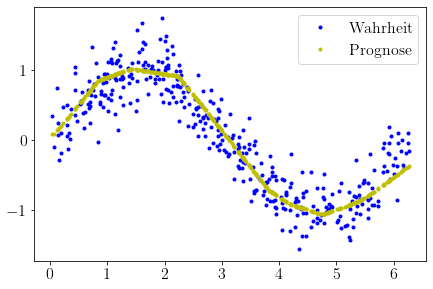

In [27]:
predictions_2 = model_2.predict(x_test)
plot_predictions(predictions_2, model_num=2)

In [28]:
import pathlib

converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
model_path = pathlib.Path("models")

with open(model_path / "sine_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\jens\AppData\Local\Temp\tmppj5u3fo1\assets


In [32]:
import numpy as np

converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_dataset():
  for value in x_test:
    yield [np.array(value.numpy(), dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.int8
# converter.inference_output_type = tf.int8
tflite_model = converter.convert()

with open("sine_model_quantized.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\jens\AppData\Local\Temp\tmp5el3pk8v\assets


INFO:tensorflow:Assets written to: C:\Users\jens\AppData\Local\Temp\tmp5el3pk8v\assets


In [30]:
sine_model = tf.lite.Interpreter("sine_model.tflite")
sine_model_quant = tf.lite.Interpreter("sine_model_quantized.tflite",)

sine_model.allocate_tensors()
sine_model_quant.allocate_tensors()

sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]

sine_model_quant_input_index = sine_model_quant.get_input_details()[0]["index"]
sine_model_quant_output_index = sine_model_quant.get_output_details()[0]["index"]

sine_model_predictions = []
sine_model_quant_predictions = []

for value in x_test[:, 0]:
    value_tensor_float = tf.convert_to_tensor([[value]], dtype=tf.float32)
    value_tensor_int = tf.convert_to_tensor([[value]], dtype=tf.int8)

    sine_model.set_tensor(sine_model_input_index, value_tensor_float)
    sine_model_quant.set_tensor(sine_model_quant_input_index, value_tensor_float)

    sine_model.invoke()
    sine_model_quant.invoke()

    sine_model_predictions.append(
        sine_model.get_tensor(sine_model_output_index)[0,0]
    )
    sine_model_quant_predictions.append(
        sine_model_quant.get_tensor(sine_model_quant_output_index)[0,0]
    )

ValueError: Cannot set tensor: Got value of type FLOAT32 but expected type INT8 for input 0, name: input_2 

In [ ]:
plt.plot(x_test, y_test, "b.", label="Wahrheit")
plt.plot(x_test, predictions_2, "ro", label="Ursprüngliche Prognose")
plt.plot(x_test, sine_model_predictions, "yx", label="Lite Prognose")
plt.plot(x_test, sine_model_quant_predictions, "g+", label="Lite quantisierte Prognose")
plt.legend()
save_fig("model-comparison")
plt.show()

In [ ]:
import os
sine_size = os.path.getsize("sine_model.tflite")
print(f"Sine model size: {sine_size}")
sine_quant_size = os.path.getsize("sine_model_quantized.tflite")
print(f"Sine quant model size: {sine_quant_size}")